In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers, models
import os

In [13]:
train_data_path='Facial_Images/train/'
val_data_path='Facial_Images/validation/'

In [14]:
x=0
for expression in os.listdir(train_data_path):
    print(expression, " ",len(os.listdir(train_data_path + "/" + expression)))
    x=x+len(os.listdir(train_data_path + expression))
print("Total images: ",x)

angry   3993
disgust   436
fear   4103
happy   7164
neutral   4982
sad   4938
surprise   3205
Total images:  28821


In [15]:
emotions=[]
x=0
for expression in os.listdir(val_data_path):
    print(expression, " ",len(os.listdir(val_data_path + "/" + expression)))
    data=[expression]
    x=x+len(os.listdir(val_data_path + "/" + expression))
    emotions.append(data)
print("Total images: ",x)

angry   960
disgust   111
fear   1018
happy   1825
neutral   1216
sad   1139
surprise   797
Total images:  7066


In [16]:
emotions

[['angry'],
 ['disgust'],
 ['fear'],
 ['happy'],
 ['neutral'],
 ['sad'],
 ['surprise']]

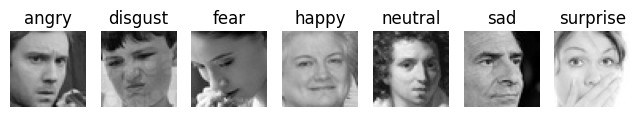

In [17]:
i=1
plt.figure(figsize=(8,8))
for expression in os.listdir(train_data_path):
    image=load_img((train_data_path + expression) + '/' + os.listdir(train_data_path + expression)[0])
    plt.subplot(1,7,i)
    plt.imshow(image)
    plt.title(expression)
    plt.axis('off')
    i=i+1
plt.show()

In [18]:
train_data_gen=ImageDataGenerator()

train_dataset=train_data_gen.flow_from_directory(
    train_data_path,
    shuffle=True,
    target_size=(48,48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128)

Found 28821 images belonging to 7 classes.


In [19]:
val_data_gen=ImageDataGenerator()

val_dataset=val_data_gen.flow_from_directory(
    val_data_path,
    shuffle=True,
    target_size=(48,48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128)

Found 7066 images belonging to 7 classes.


In [33]:
model=models.Sequential()

model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(5,5),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(7,activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_7 (Batc  (None, 24, 24, 128)     

In [34]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(train_dataset,epochs=5,validation_data=val_dataset,batch_size=128, verbose=1)

Epoch 1/5
226/226 [==============================] - 266s 1s/step - loss: 1.8060 - accuracy: 0.2955 - val_loss: 1.7533 - val_accuracy: 0.2839
Epoch 2/5
226/226 [==============================] - 265s 1s/step - loss: 1.4692 - accuracy: 0.4311 - val_loss: 1.5351 - val_accuracy: 0.4275
Epoch 3/5
226/226 [==============================] - 258s 1s/step - loss: 1.2963 - accuracy: 0.4992 - val_loss: 1.3453 - val_accuracy: 0.4895
Epoch 4/5
226/226 [==============================] - 265s 1s/step - loss: 1.1908 - accuracy: 0.5463 - val_loss: 1.1826 - val_accuracy: 0.5576
Epoch 5/5
226/226 [==============================] - 252s 1s/step - loss: 1.1096 - accuracy: 0.5765 - val_loss: 1.1586 - val_accuracy: 0.5549


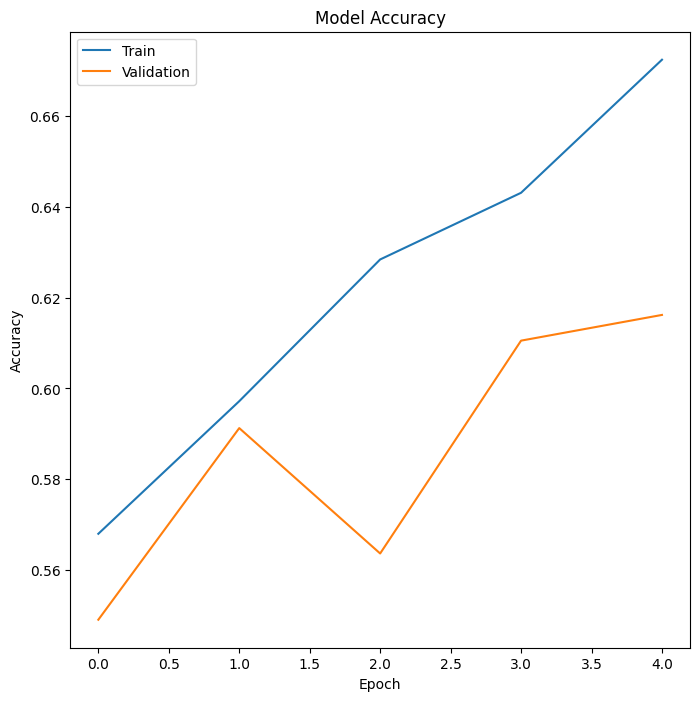

In [23]:
plt.figure(figsize=(8,8))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()


In [24]:
#save model
model.save('Facial_Expression_classification.keras')

In [25]:
#load model
model=tf.keras.models.load_model('Facial_Expression_classification.keras')

In [26]:
import cv2

In [27]:
image=cv2.imread('Google_Images/Angry.jpg')[:,:,0]
image=cv2.resize(image,(48,48))
image=np.invert(np.array([image]))

In [28]:
output=model.predict(image)

1/1 [==============================] - 0s 225ms/step


In [29]:
np.argmax(output)

4

In [30]:
data=emotions[np.argmax(output)]

In [31]:
data[0]

'neutral'

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_26 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_33 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_27 (Bat  (None, 24, 24, 128)    

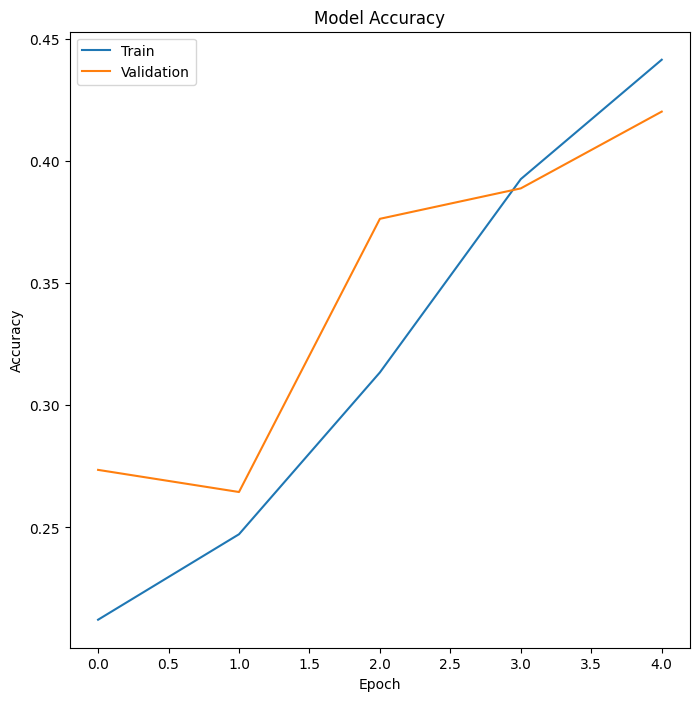

1/1 [==============================] - 1s 527ms/step


'sad'

In [75]:
#using CNN-LSTM
cnn_lstm_model=models.Sequential()

cnn_lstm_model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(48,48,1)))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.MaxPooling2D(pool_size=(2,2)))
cnn_lstm_model.add(layers.Dropout(0.25))

cnn_lstm_model.add(layers.Conv2D(128,(5,5),padding='same',activation='relu'))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.MaxPooling2D(pool_size=(2,2)))
cnn_lstm_model.add(layers.Dropout(0.25))

cnn_lstm_model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.MaxPooling2D(pool_size=(2,2)))
cnn_lstm_model.add(layers.Dropout(0.25))

cnn_lstm_model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.MaxPooling2D(pool_size=(2,2)))
cnn_lstm_model.add(layers.Dropout(0.25))

cnn_lstm_model.add(layers.TimeDistributed(layers.Flatten()))

cnn_lstm_model.add(layers.LSTM(128))
cnn_lstm_model.add(layers.Dropout(0.25))

cnn_lstm_model.add(layers.Dense(128))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.Activation('relu'))
cnn_lstm_model.add(layers.Dropout(0.25))

cnn_lstm_model.add(layers.Dense(256))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.Activation('relu'))
cnn_lstm_model.add(layers.Dropout(0.25))

cnn_lstm_model.add(layers.Dense(7,activation='softmax'))

cnn_lstm_model.summary()

cnn_lstm_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

cnn_lstm_model.fit(train_dataset,epochs=5,validation_data=val_dataset,batch_size=128, verbose=1)

plt.figure(figsize=(8,8))
plt.plot(cnn_lstm_model.history.history['accuracy'])
plt.plot(cnn_lstm_model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

#save model
cnn_lstm_model.save('Facial_Expression_classification_CNN_LSTM.keras')

#load model
cnn_lstm_model=tf.keras.models.load_model('Facial_Expression_classification_CNN_LSTM.keras')

image=cv2.imread('Google_Images/Angry.jpg')[:,:,0]
image=cv2.resize(image,(48,48))
image=np.invert(np.array([image]))

output=cnn_lstm_model.predict(image)

np.argmax(output)

data=emotions[np.argmax(output)]

data[0]